In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 
20 20 20 20 20


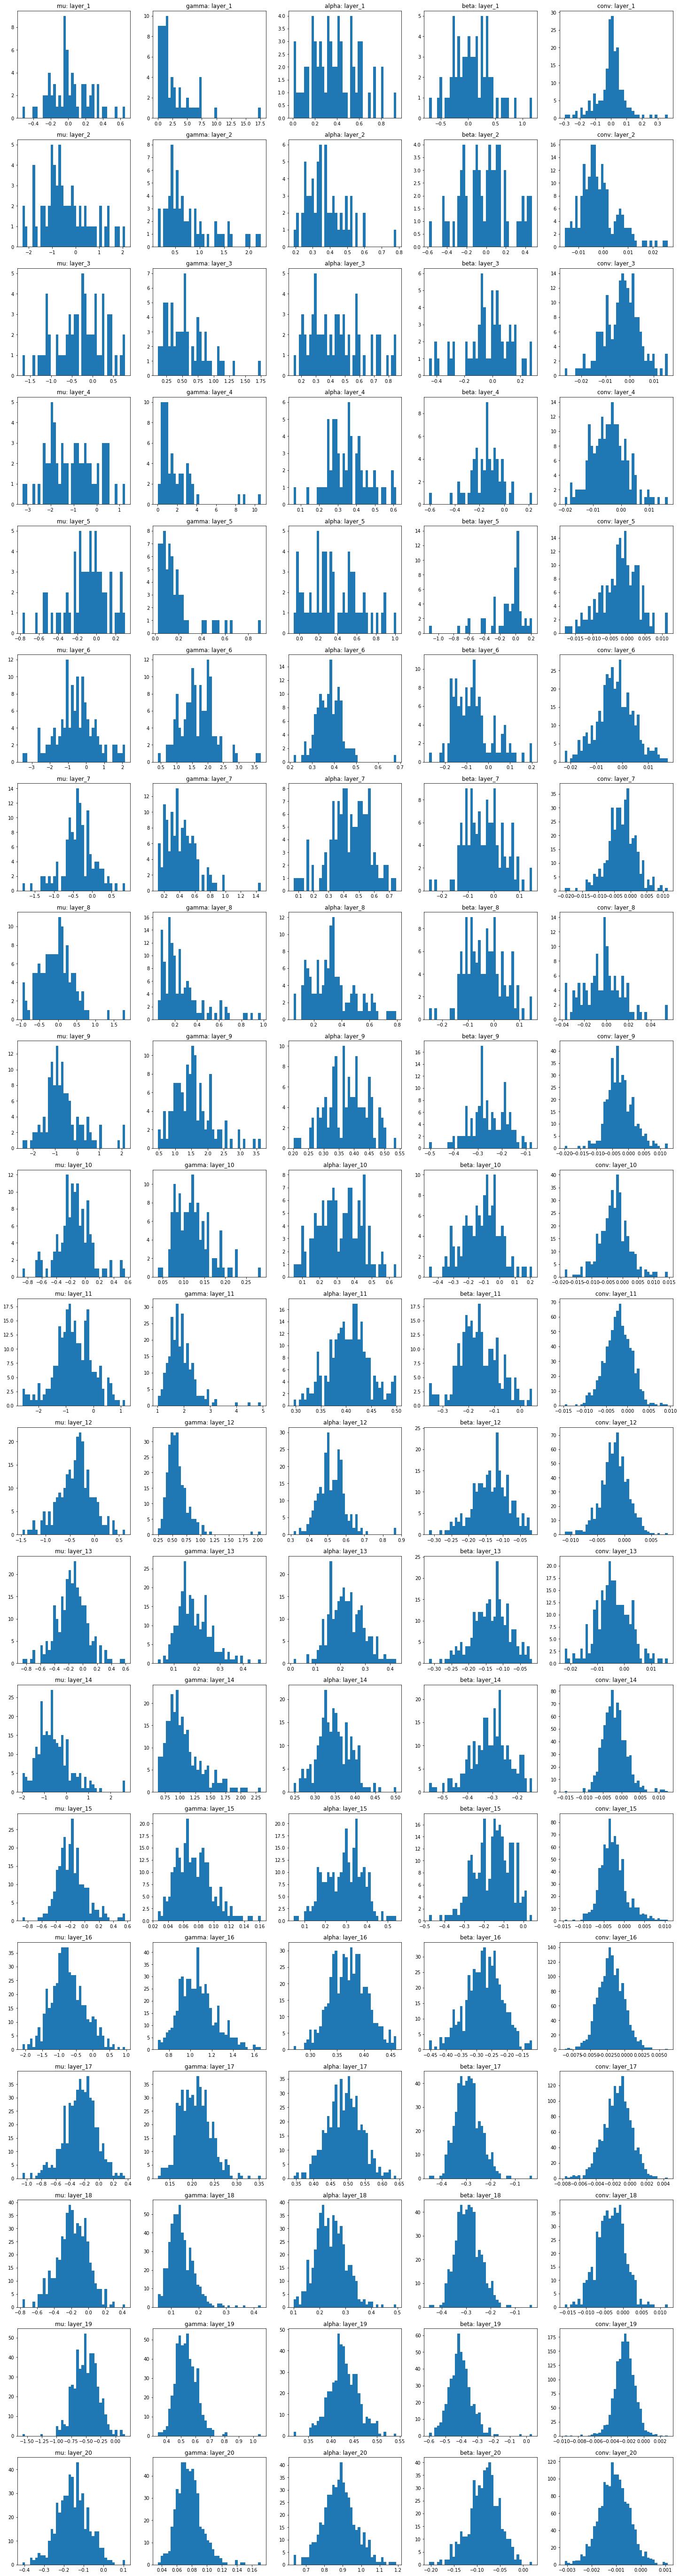

In [72]:
#bn
model = torch.load("results/resnet18_bn_bsz_128/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("bn(bn-relu).pdf")
plt.show()


============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 
20 20 20 20 20


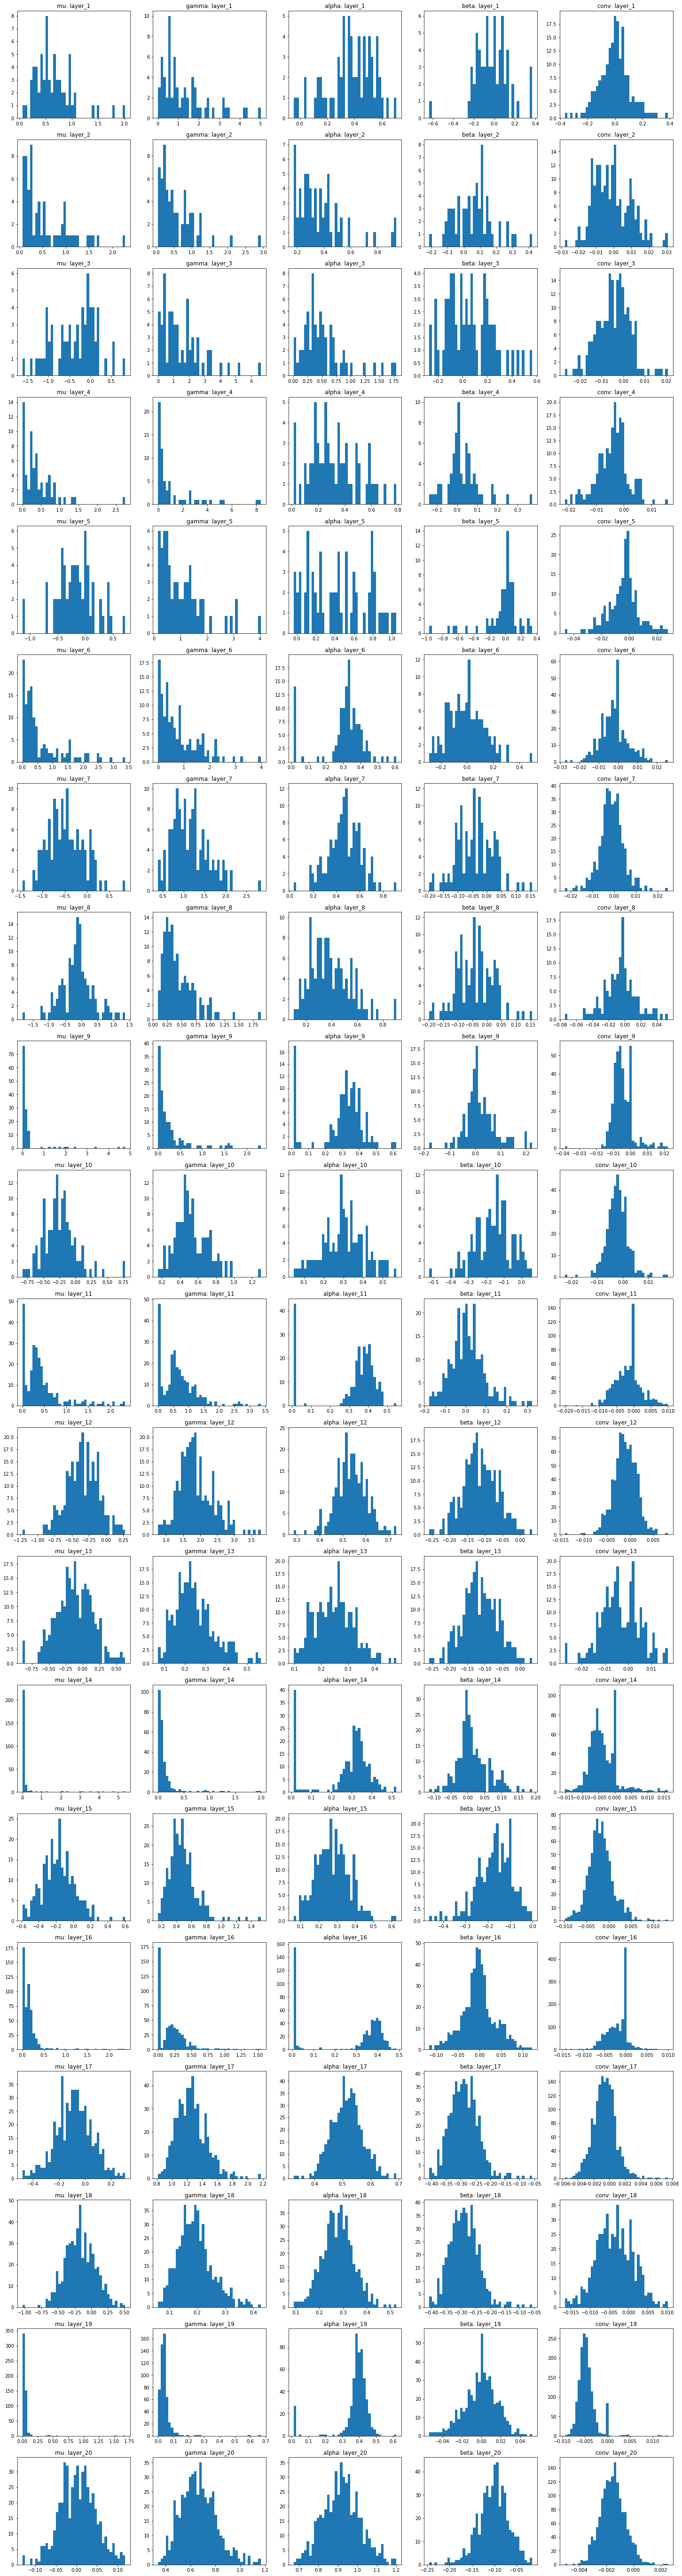

In [71]:
# bn after relu
model = torch.load("results/resnet_inverse_18/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("bn(relu-bn).pdf")
plt.show()

(\)

============mu =========== 
============gamma =========== 
============conv =========== 
17 17 20 20 20


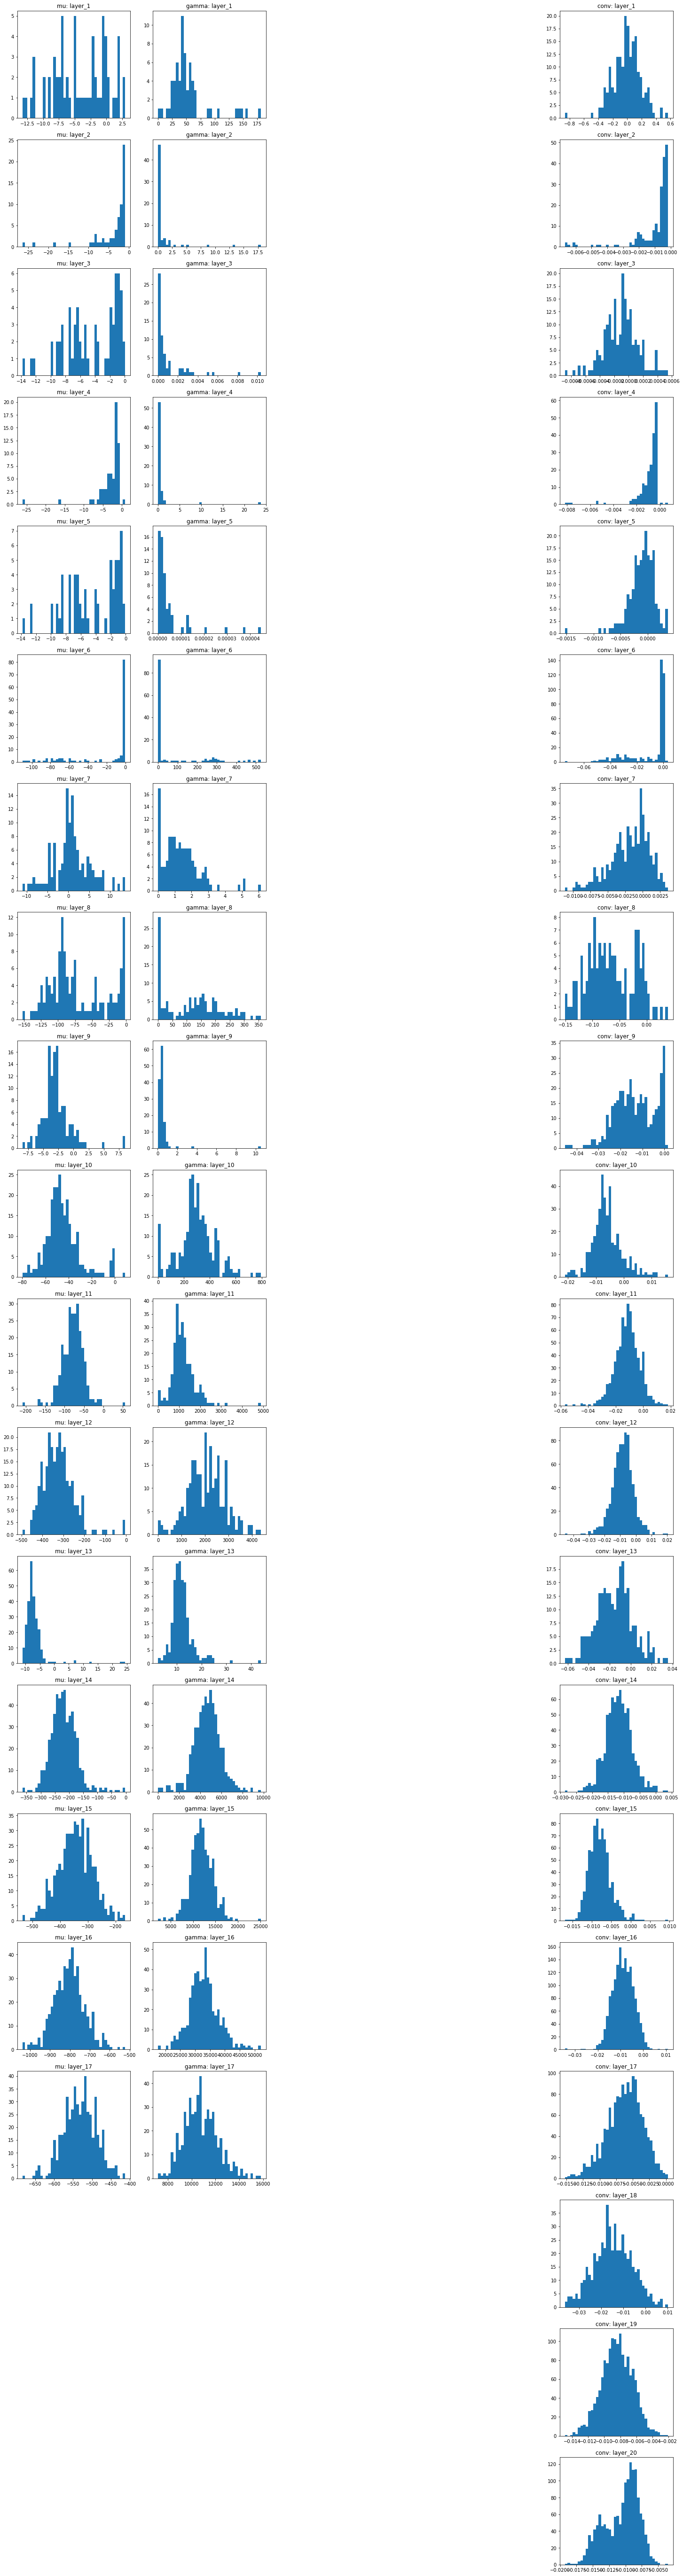

In [70]:
#sgd
model = torch.load("results/results/resnet18_nobn_bsz_128_1/_Thu-Jul--9-11:38:46-2020/epoch_200.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(conv), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(conv), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
# print("============alpha =========== ")


# alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
#         ('downsample.1' in i and 'weight' in i)]
# for i in range(len(alpha)):
#     plt.subplot( len(conv),5, i*5+3)
#     plt.hist(alpha[i].view(-1).numpy(), bins=40)
#     plt.title("alpha: layer_{}".format(i+1))

# print("============betta =========== ")


# beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
#         ('downsample.1' in i and 'bias' in i)]
# for i in range(len(beta)):
#     plt.subplot( len(conv),5, i*5+4)
#     plt.hist(beta[i].view(-1).numpy(), bins=40)
#     plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(conv),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("sgd.pdf")


plt.show()




============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


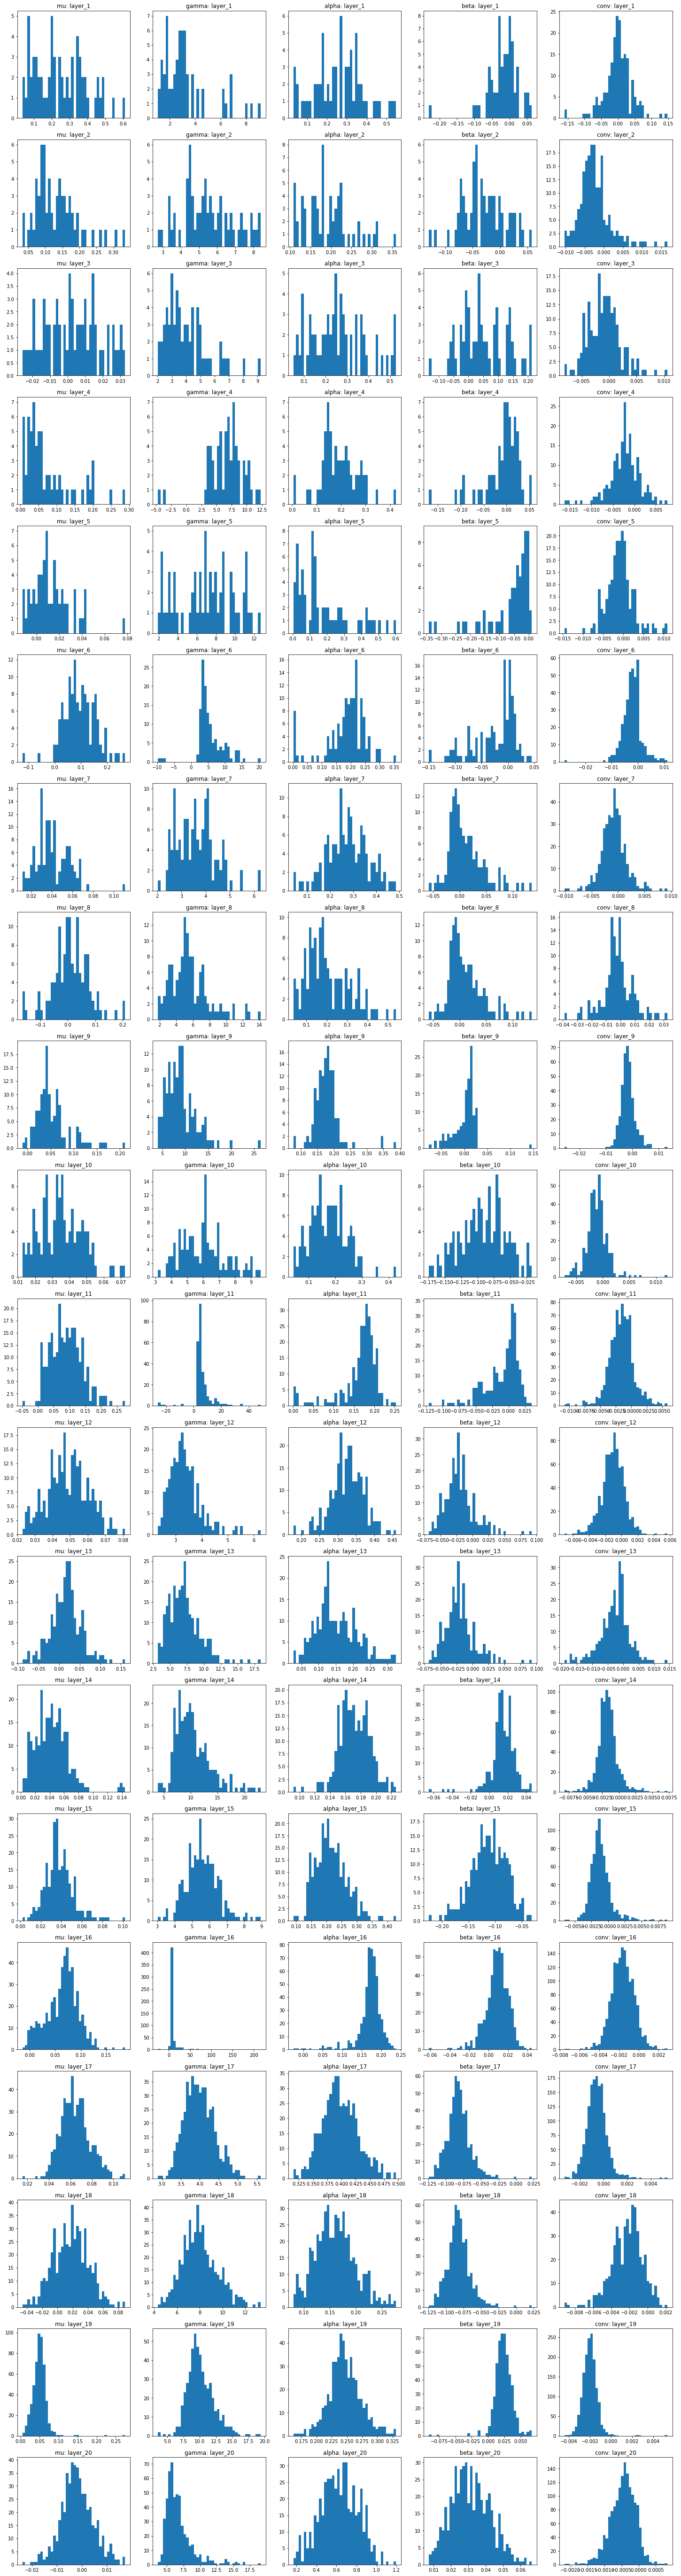

20 20 20 20 20


In [212]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(1/(gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

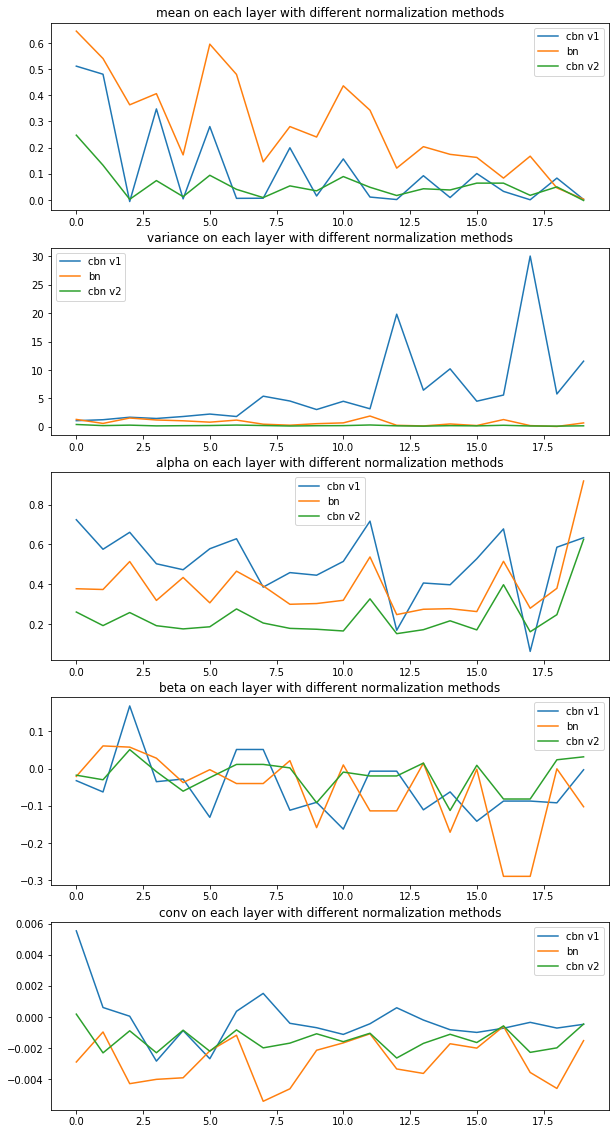

In [275]:
model = torch.load("../gamma_nominator/dual_bn/results/vgg/resnet18_constraint_bsz_128_gamma-nominator/epoch_199.pth",map_location="cpu")
model1 = torch.load("results/results/resnet18_nobn_bsz_128_1/_Thu-Jul--9-11:38:46-2020/epoch_200.pth", map_location="cpu")
model2 = torch.load("results/resnet_inverse_18/epoch_199.pth", map_location="cpu")
model3 = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")



mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
mu = [i.mean() for i in mu]

mu1 = [j  for (i,j) in model1['state_dict'].items() if 'running_mean' in i]
mu1 = [i.mean().abs() for i in mu1]

mu2 = [j  for (i,j) in model2['state_dict'].items() if 'running_mean' in i]
mu2 = [i.mean().abs() for i in mu2]
mu3 = [j  for (i,j) in model3['state_dict'].items() if 'mu_' in i]
mu3 = [i.mean() for i in mu3]

plt.figure(figsize=(10,20))
plt.subplot(5, 1, 1)
plt.plot(mu, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(mu2, label="bn")
plt.plot(mu3, label="cbn v2")
plt.legend()
plt.title("mean on each layer with different normalization methods")

gamma = [1/(j+1e-4)  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
gamma = [i.mean() for i in gamma]
gamma1 = [j  for (i,j) in model1['state_dict'].items() if 'running_var' in i]
gamma1 = [i.mean() for i in gamma1]


gamma2 = [j  for (i,j) in model2['state_dict'].items() if 'running_var' in i]
gamma2 = [i.mean() for i in gamma2]

gamma3 = [j  for (i,j) in model3['state_dict'].items() if 'gamma_' in i]
gamma3 = [i.mean() for i in gamma3]


plt.subplot(5, 1, 2)



plt.plot(gamma, label="cbn v1")
# plt.plot(gamma1, label="plain (sgd)")
plt.plot(gamma2, label="bn")
plt.plot(gamma3, label="cbn v2")
plt.legend()



plt.title("variance on each layer with different normalization methods")

alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
alpha = [i.mean() for i in alpha]

alpha2 = [j  for (i,j) in model2['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
alpha2 = [i.mean() for i in alpha2]

alpha3 = [j  for (i,j) in model3['state_dict'].items() if 'u_' in i and 'mu_' not in i]
alpha3 = [i.mean() for i in alpha3]
plt.legend()


plt.subplot(5, 1, 3)



plt.plot(alpha, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(alpha2, label="bn")
plt.plot(alpha3, label="cbn v2")
plt.legend()



plt.title("alpha on each layer with different normalization methods")

beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i ]
beta = [i.mean() for i in beta]

beta2 = [j  for (i,j) in model2['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]

beta2 = [i.mean() for i in beta2]


beta3 = [j  for (i,j) in model3['state_dict'].items() if 'c_' in i ]
beta3 = [i.mean() for i in beta3]
plt.legend()


plt.subplot(5, 1, 4)



plt.plot(beta, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(beta2, label="bn")
plt.plot(beta3, label="cbn v2")

plt.legend()


plt.title("beta on each layer with different normalization methods")

conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv = [i.mean() for i in conv]

conv1 = [j  for (i,j) in model1['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv1 = [i.mean() for i in conv1]


conv2 = [j  for (i,j) in model2['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv2 = [i.mean() for i in conv2]

conv3 = [j  for (i,j) in model3['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv3 = [i.mean() for i in conv3]

plt.subplot(5, 1, 5)



plt.plot(conv, label="cbn v1")
# plt.plot(conv1, label="plain (sgd)")
plt.plot(conv2, label="bn")
plt.plot(conv3, label="cbn v2")

plt.legend()


plt.title("conv on each layer with different normalization methods")




plt.legend()
plt.show()



In [257]:
conv2[0].shape

(64, 3, 3, 3)

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


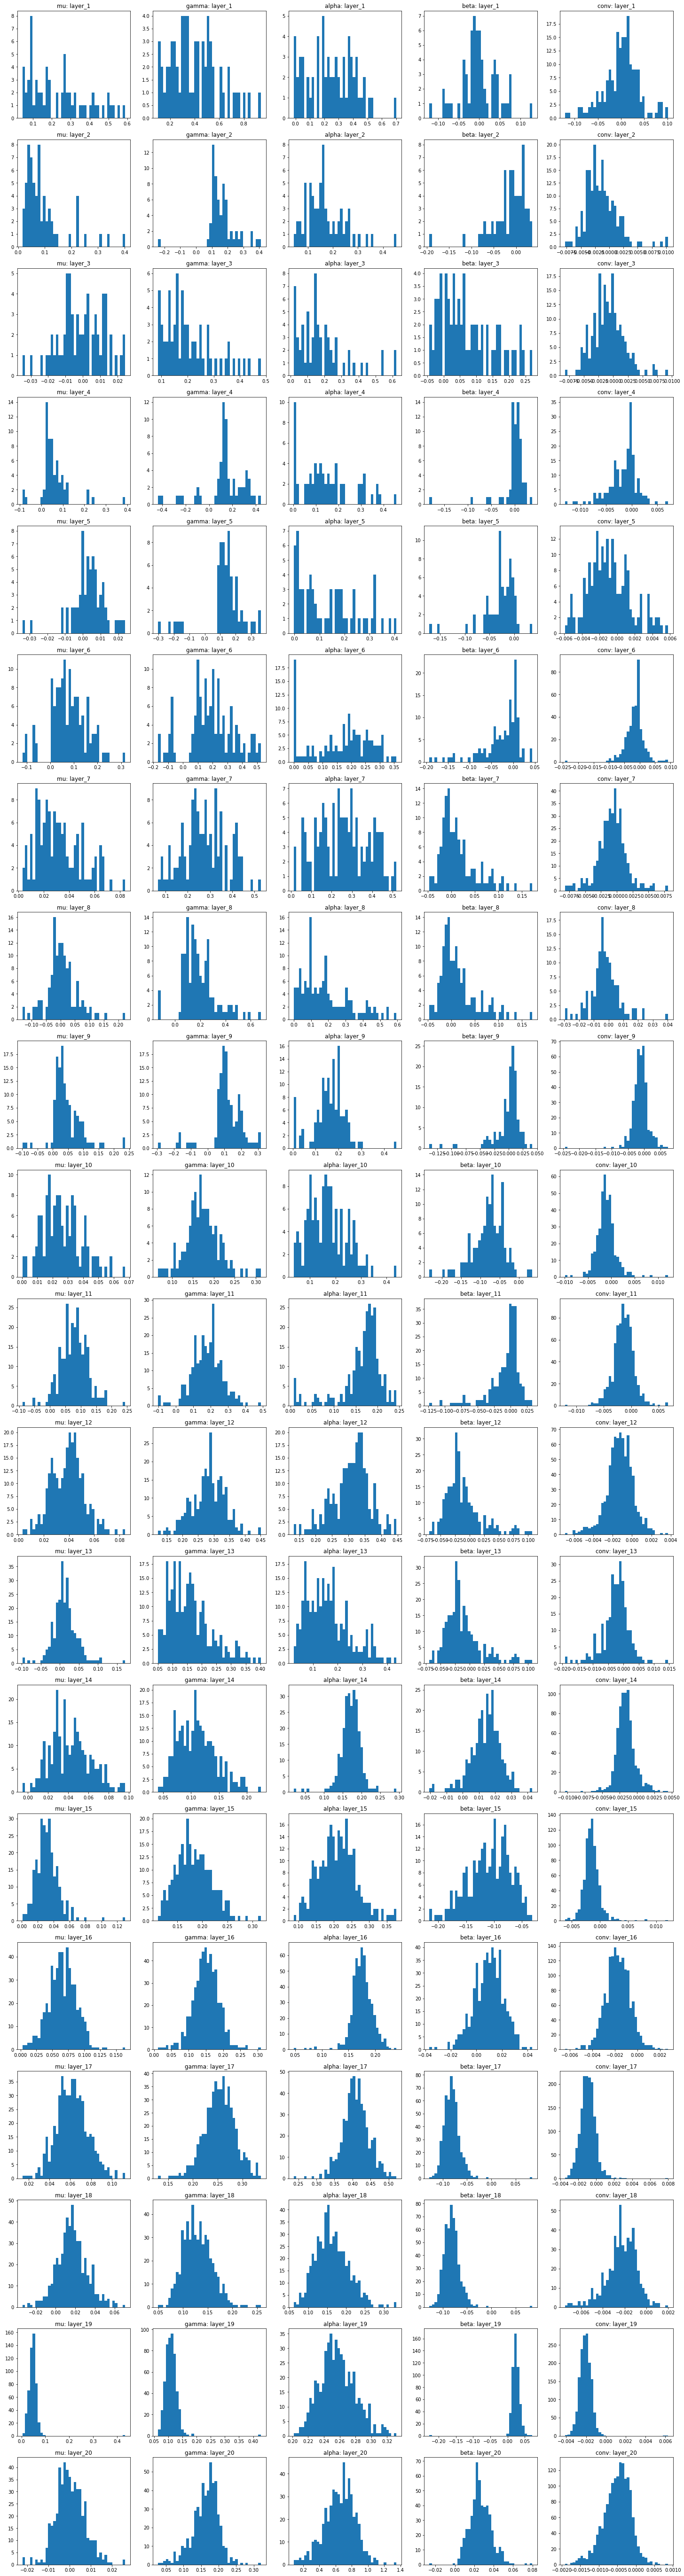

20 20 20 20 20


In [69]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist((gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


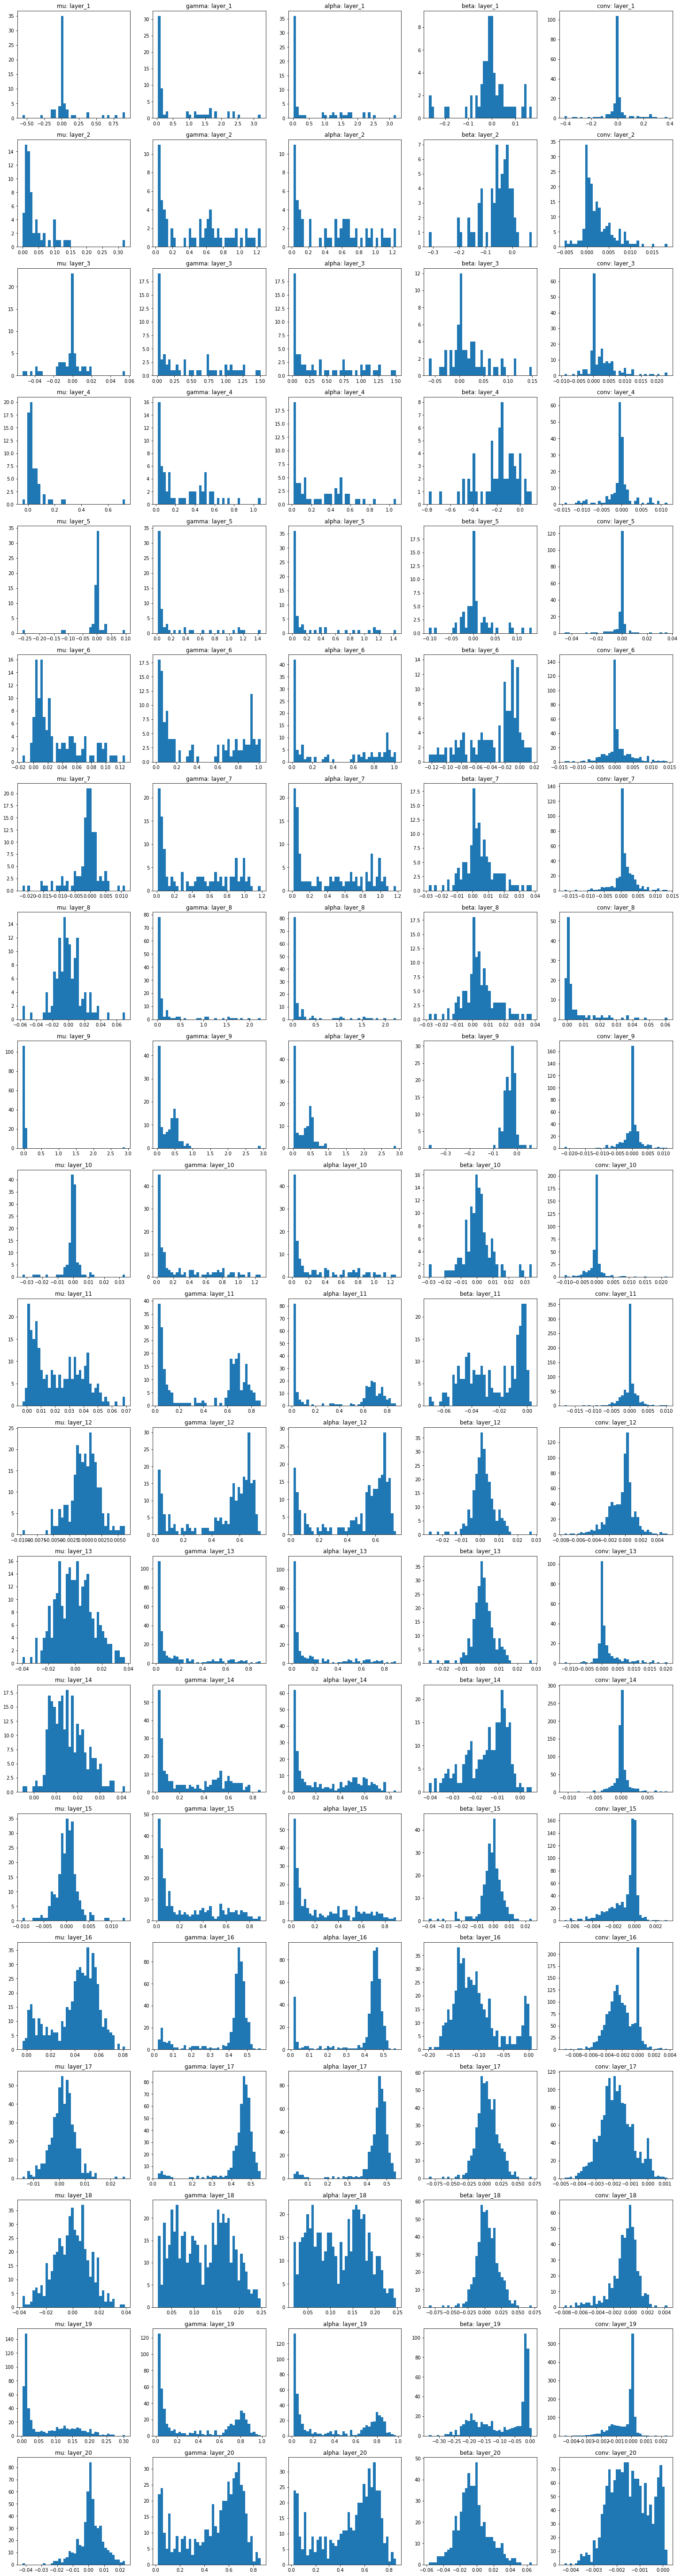

20 20 20 20 20


In [68]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128_wo_weight/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist((gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn_wo_weight-decay.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))


============mu =========== 
============gamma =========== 
============alpha =========== 
0.01327915
layer 0 gamma**2<1e-3: 0
0.0076489327
layer 1 gamma**2<1e-3: 0
0.010325969
layer 2 gamma**2<1e-3: 0
0.005252598
layer 3 gamma**2<1e-3: 0
0.006491917
layer 4 gamma**2<1e-3: 0
0.00292791
layer 5 gamma**2<1e-3: 0
0.014079201
layer 6 gamma**2<1e-3: 0
0.0021969636
layer 7 gamma**2<1e-3: 0
0.0021339052
layer 8 gamma**2<1e-3: 0
0.00978396
layer 9 gamma**2<1e-3: 0
0.0012273034
layer 10 gamma**2<1e-3: 0
0.027789026
layer 11 gamma**2<1e-3: 0
0.0027424148
layer 12 gamma**2<1e-3: 0
0.0009125152
layer 13 gamma**2<1e-3: 1
0.012368553
layer 14 gamma**2<1e-3: 0
0.00012361986
layer 15 gamma**2<1e-3: 17
0.023375612
layer 16 gamma**2<1e-3: 0
0.004259354
layer 17 gamma**2<1e-3: 0
0.0016696675
layer 18 gamma**2<1e-3: 0
0.00226633
layer 19 gamma**2<1e-3: 0
============alpha ==========min gamma**2 [False False False False False False False False False False False False
 False False False False False False Fal

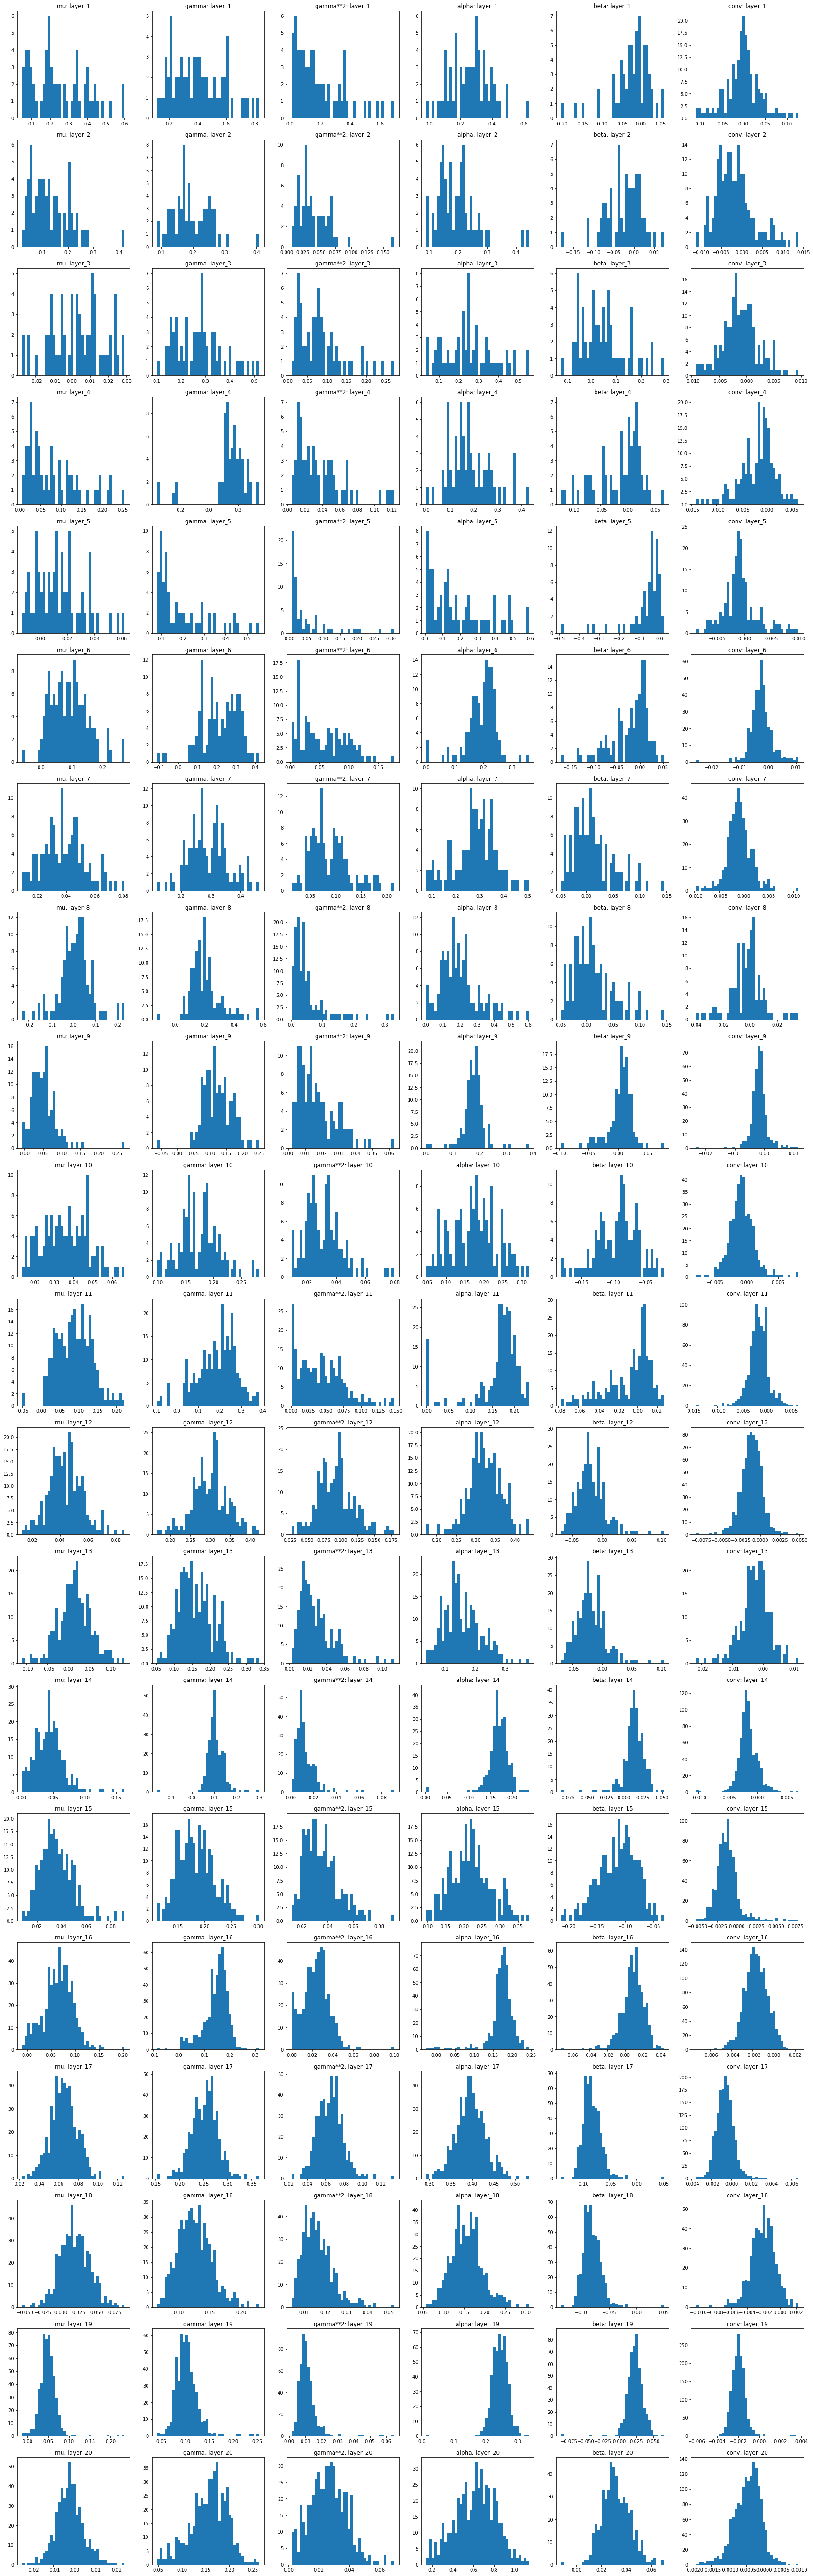

20 20 20 20 20


In [102]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")

gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")

small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    print(b.min())
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    print("layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))
    plt.title("gamma**2: layer_{}".format(i+1))
print("============alpha ==========" + "min gamma**2 {} ".format(b_min +  "layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

============mu =========== 
mean:  0.00173 -0.82343 -0.10704 -0.76245 -0.07024 -0.46862 -0.12195 -0.04901 -0.35113 -0.09802 -0.28797 -0.16778 -0.02180 -0.39040 -0.11216 -0.33748 -0.12949 -0.02241 -0.77733 -0.01333
var:  0.00025 0.77675 0.08314 0.69793 0.02053 0.20916 0.04643 0.06732 0.18596 0.02016 0.11770 0.02494 0.00721 0.12919 0.01285 0.03135 0.00407 0.00344 0.02563 0.00051
============gamma =========== 
mean:  3.49793 0.54676 0.12918 0.63838 0.05935 0.80883 0.10353 0.07145 0.28089 0.04027 0.28470 0.09596 0.01834 0.17096 0.02425 0.14375 0.02434 0.01284 0.20582 0.01488
var:  14.40508 0.14248 0.01075 0.05612 0.00082 0.07680 0.00317 0.00337 0.01162 0.00030 0.00647 0.00125 0.00007 0.00231 0.00014 0.00081 0.00008 0.00002 0.00165 0.00001
============alpha =========== 
mean:  0.26234 0.36551 0.40463 0.35228 0.39571 0.34004 0.34804 0.17395 0.33504 0.28958 0.32256 0.33484 0.09972 0.28852 0.25644 0.27946 0.45432 0.20385 0.29098 1.76471
var:  0.01605 0.02243 0.01761 0.00423 0.02452 0.00197 0.0

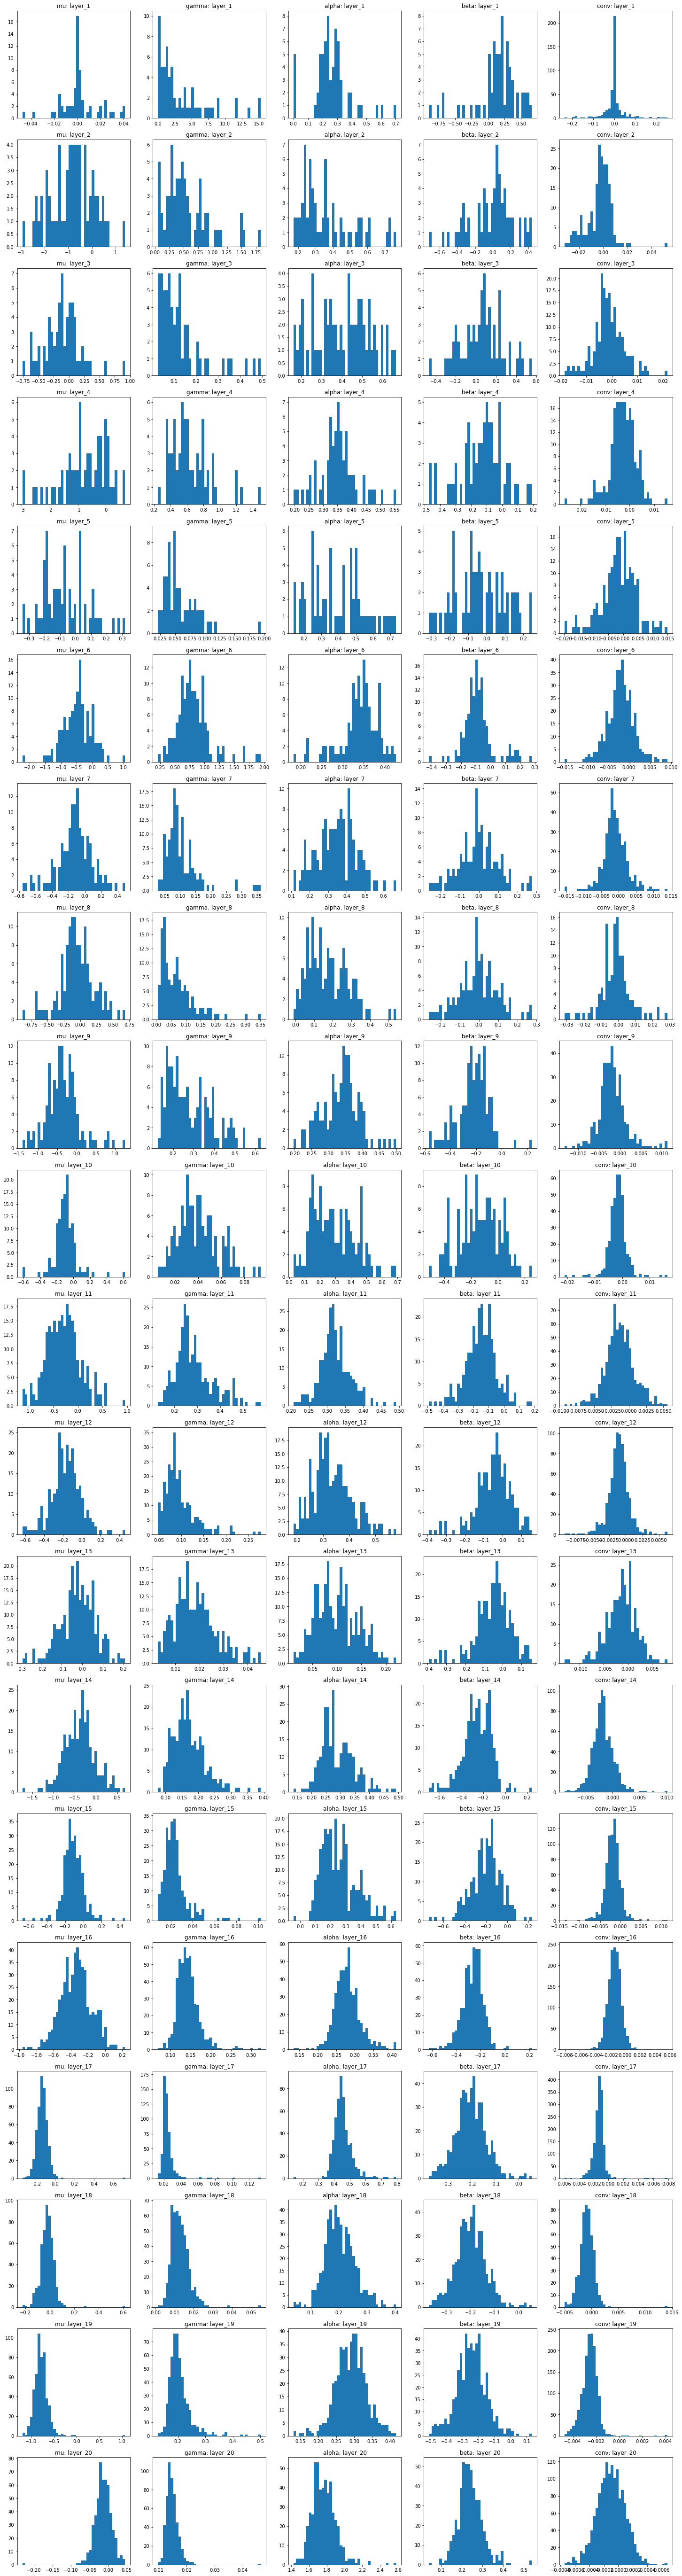

In [4]:
#bn
model = torch.load("results/resnet18_bn_bsz512+norm+mybn_Sat-Aug--8-10:11:44-2020/101_checkpoint.pth.tar", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]
f = open("bn_bsz_1024.txt", 'w')
mean = ''
var = ''
for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(mu[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(mu[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============gamma =========== ")
f.write("")
    
mean = ''
var = ''
gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(gamma[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(gamma[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============alpha =========== ")

mean = ''
var = ''
alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(alpha[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(alpha[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============betta =========== ")

mean = ''
var = ''
beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(beta[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(beta[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============conv =========== ")

mean = ''
var = ''
for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(conv[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(conv[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
plt.savefig("bn(bn-relu).pdf")
plt.show()




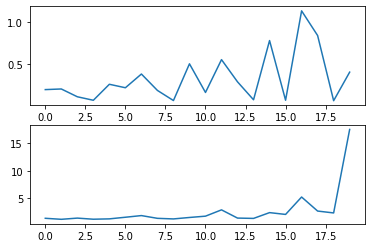

In [22]:
model = torch.load("./results/imagenet/constraint_20+norm_layer_+cbn+noise_0.0001+warmup_+41,61,81_Mon-Aug-10-07:16:21-2020/119_checkpoint.pth.tar",map_location="cpu")
track_times = model['state_dict']['module.bn1.tracking_times']
mean = [j/track_times  for (i,j) in model['state_dict'].items() if 'mean' in i]
mean = [i.abs().mean() for i in mean]
plt.subplot(211)
plt.plot(mean)
var = [j/track_times  for (i,j) in model['state_dict'].items() if 'var' in i]
var = [i.abs().mean() for i in var]
plt.subplot(212)
plt.plot(var)

============mu =========== 
mean:  0.09389 0.04106 -0.00293 0.02803 -0.00222 0.03562 0.00290 -0.00009 0.01702 0.00171 0.02397 0.00899 0.00068 0.01291 0.00550 0.01381 0.01274 0.00343 0.01437 -0.00757
var:  0.00247 0.00050 0.00002 0.00065 0.00002 0.00038 0.00002 0.00003 0.00023 0.00001 0.00013 0.00002 0.00002 0.00016 0.00001 0.00004 0.00003 0.00002 0.00005 0.00001
============gamma =========== 
mean:  0.07757 0.00631 0.01023 0.00393 0.00704 0.00898 0.01067 0.00538 0.00209 0.00496 0.00427 0.00766 0.00146 0.00184 0.00276 0.00151 0.00360 0.00111 0.00088 0.00059
var:  0.00551 0.00003 0.00002 0.00000 0.00002 0.00002 0.00002 0.00002 0.00000 0.00000 0.00001 0.00001 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000
============alpha =========== 
mean:  0.12145 0.18019 0.23588 0.18210 0.19504 0.16934 0.24357 0.11315 0.15448 0.17459 0.15299 0.24152 0.07790 0.13249 0.17908 0.13780 0.24071 0.10653 0.18099 0.73524
var:  0.00537 0.00053 0.00732 0.00048 0.01028 0.00015 0.00325 0.00330 0.0

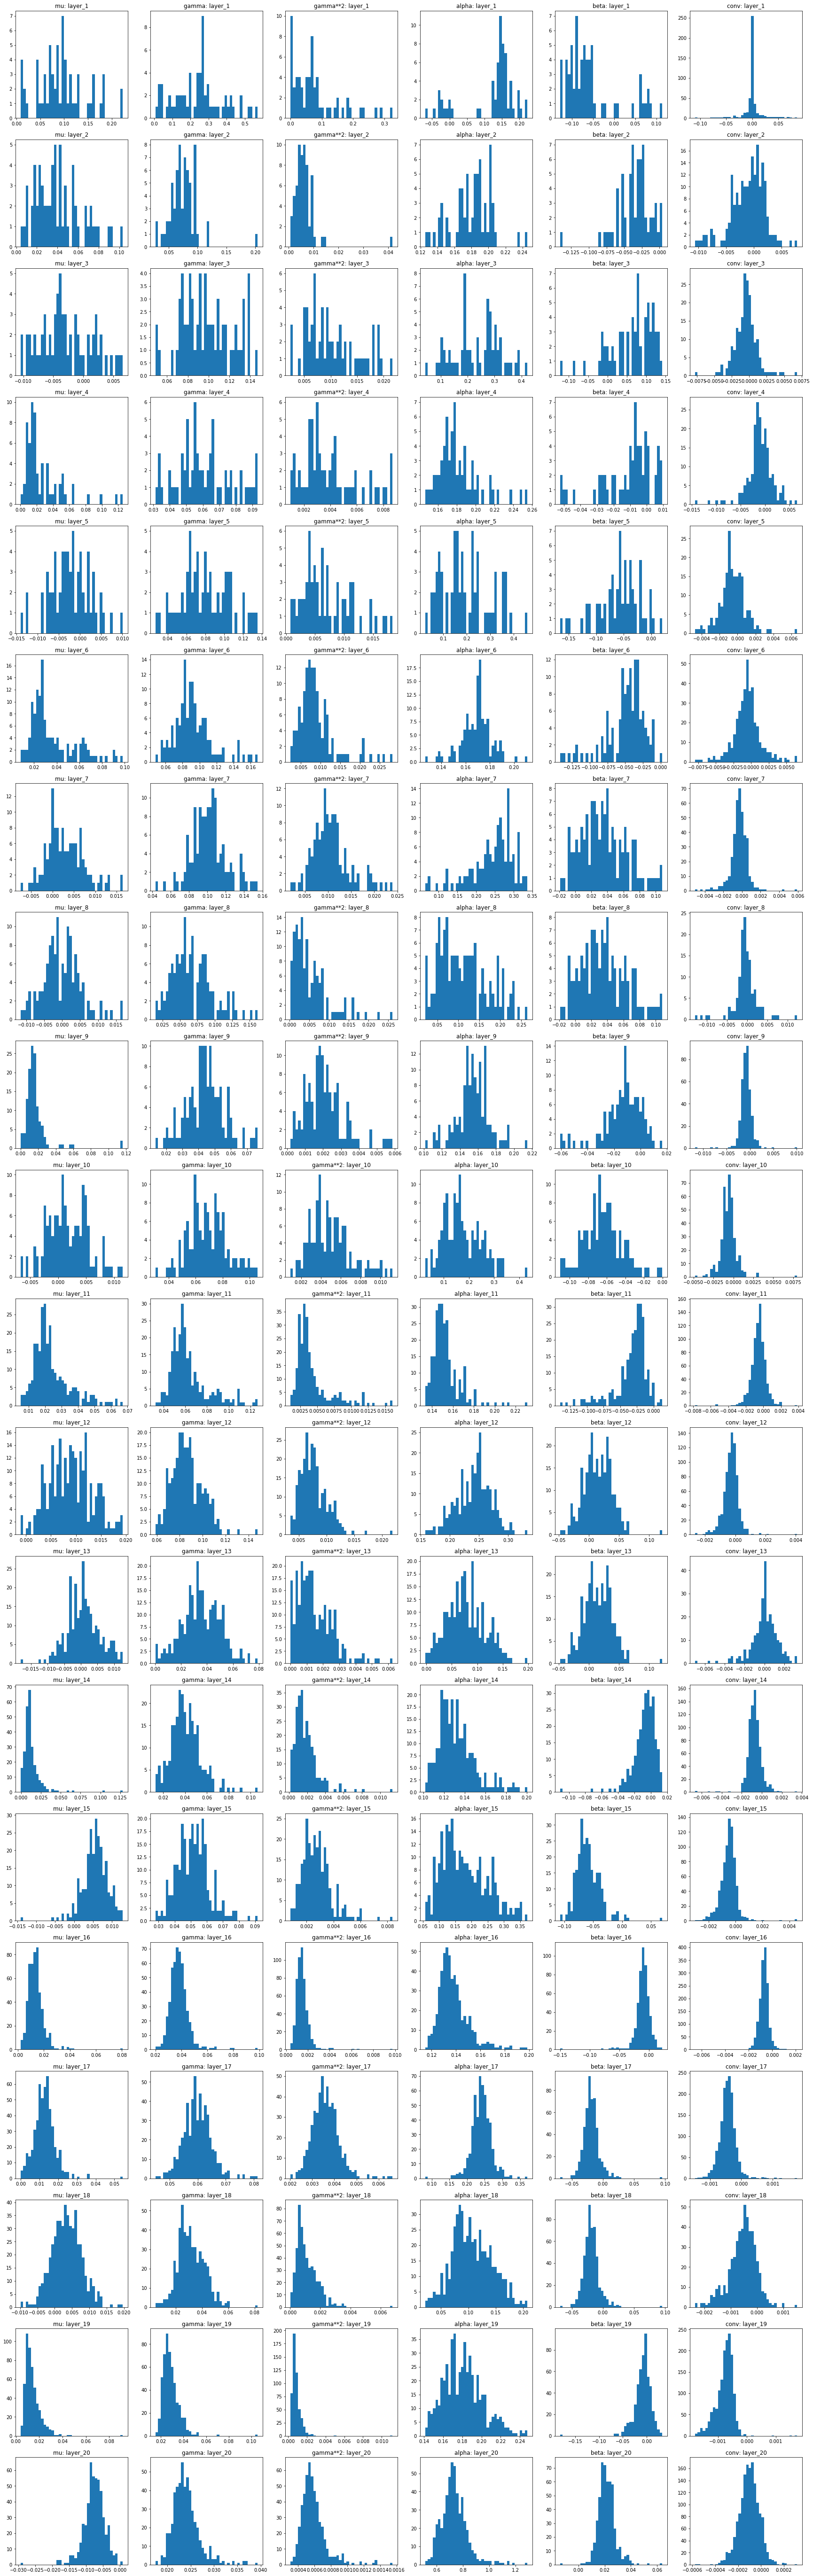

20 20 20 20 20


In [3]:
#constrained
model = torch.load("./results/imagenet/constraint_20+norm_layer_+cbn+noise_0.0001+warmup_+41,61,81_Mon-Aug-10-07:16:21-2020/119_checkpoint.pth.tar",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]

mean = ''
var = ''

for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(mu[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(mu[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============gamma =========== ")
mean = ''
var = ''
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))

mean = ''
var = ''
small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    plt.title("gamma**2: layer_{}".format(i+1))

    mean += " {:.5f}".format(np.mean((gamma[i]**2).view(-1).numpy()))
    var += " {:.5f}".format(np.var((gamma[i]**2).view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============alpha =========== ")


mean = ''
var = ''
alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(alpha[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(alpha[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============betta =========== ")
mean = ''
var = ''

beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(beta[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(beta[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============conv =========== ")

mean = ''
var = ''
for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(conv[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(conv[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))